Exploring dates and times in Python
===================================

Python's `datetime` and `timedelta` classes
-------------------------------------------

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from datetime import datetime
from datetime import timedelta

Python has a module called `datetime` as part of its base system. 

https://docs.python.org/3/library/datetime.html

> The datetime module supplies classes for manipulating dates and times in both simple and complex ways. While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

Datetimes can be *naive* or *aware*

* naive objects don't know about timezones and their interpretation is application (coder) dependent
* aware objects do know about timezones and are unambiguous

Let's check out a few `datetime` objects.

In [28]:
datetime.now()

datetime.datetime(2023, 4, 26, 14, 1, 42, 908669)

In [29]:
# Create a list of dates
dates = [datetime(2023, 5, 1, 8, 30), 
         datetime(2023, 5, 1, 9, 25), 
         datetime(2023, 5, 1, 15, 30)]

In [30]:
dates

[datetime.datetime(2023, 5, 1, 8, 30),
 datetime.datetime(2023, 5, 1, 9, 25),
 datetime.datetime(2023, 5, 1, 15, 30)]

In [31]:
type(dates[0])

datetime.datetime

In [32]:
intime_dt = dates[0]
outtime_dt = dates[1]
type(intime_dt)

datetime.datetime

In [33]:
# The commented out lines represent attributes that ARE available in pandas Timestamp objects
#   but not in Python datetime objects
print(f'Datetime: {intime_dt}')
print(f'Date: {intime_dt.date()}')
print(f'Month: {intime_dt.month}')
print(f'Day: {intime_dt.day}')
#print(f'DayOfWeek: {intime_dt.dayofweek}')
print(f'Weekday: {intime_dt.weekday()}')
#print(f'DayOfYear: {intime_dt.dayofyear}')
#print(f'WeekOfYear: {intime_dt.weekofyear}')
#print(f'Quarter: {intime_dt.quarter}')
print(f'Hour: {intime_dt.hour}')
print(f'Minute: {intime_dt.minute}')
print(f'Second: {intime_dt.second}')
print(f'Microsecond: {intime_dt.microsecond}')

Datetime: 2023-05-01 08:30:00
Date: 2023-05-01
Month: 5
Day: 1
Weekday: 0
Hour: 8
Minute: 30
Second: 0
Microsecond: 0


What about the attributes of a `datetime` object?

In [34]:
atts = [att for att in dir(intime_dt) if '__' not in att]
print (atts)

['astimezone', 'combine', 'ctime', 'date', 'day', 'dst', 'fold', 'fromisocalendar', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'isocalendar', 'isoformat', 'isoweekday', 'max', 'microsecond', 'min', 'minute', 'month', 'now', 'replace', 'resolution', 'second', 'strftime', 'strptime', 'time', 'timestamp', 'timetuple', 'timetz', 'today', 'toordinal', 'tzinfo', 'tzname', 'utcfromtimestamp', 'utcnow', 'utcoffset', 'utctimetuple', 'weekday', 'year']


What if we subtract two datetimes? What data type is the result?

In [35]:
los_td = outtime_dt - intime_dt
print (los_td)
type(los_td)

0:55:00


datetime.timedelta

In [36]:
help(timedelta)

Help on class timedelta in module datetime:

class timedelta(builtins.object)
 |  Difference between two datetime values.
 |  
 |  timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
 |  
 |  All arguments are optional and default to 0.
 |  Arguments may be integers or floats, and may be positive or negative.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      True if self else False
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  

List out the attributes for `timedelta` objects. Notice how we are filtering out any attributes starting with the double underscore. Change that if you want to see what's getting filtered out.

In [37]:
atts = [att for att in dir(los_td) if '__' not in att]
#atts = [att for att in dir(los_td)]
print (atts)

['days', 'max', 'microseconds', 'min', 'resolution', 'seconds', 'total_seconds']


In [38]:
print(f'Timedelta: {los_td}')
print(f'Seconds: {los_td.seconds}')
print(f'Total Seconds: {los_td.total_seconds()}')
print(f'Microseconds: {los_td.microseconds}')
print(f'Resolution: {los_td.resolution}')
print(f'Min: {los_td.min}')
print(f'Max: {los_td.max}')

Timedelta: 0:55:00
Seconds: 3300
Total Seconds: 3300.0
Microseconds: 0
Resolution: 0:00:00.000001
Min: -999999999 days, 0:00:00
Max: 999999999 days, 23:59:59.999999


So, you can use the `total_seconds()` method to get a duration in seconds from a `timedelta` object. If duration is < 1 second, it returns fractional seconds. To convert to other time units, just do the simple math or, even better, you can divide a `timedelta` by another `timedelta`. This is actually the way that the `datetime` library intends for people to do this.

In [39]:
timedelta(days=0, seconds=0, microseconds=10)

datetime.timedelta(microseconds=10)

You can use positional arguments if you remember the order from `help(timedelta)` - days, seconds, microseconds.

In [40]:
timedelta(0, 1, 17).total_seconds()

1.000017

To convert to other time units, just do the simple math or, even better, you can divide a `timedelta` by another `timedelta`. This is actually the way that the `datetime` library intends for people to do this. The current maintainer of the Python `datetime` module, Paul Ganssle, mentions this in a popular tweet - https://twitter.com/pganssle/status/1285604008699330567?lang=en. The [Talk Python to Me podcast has a nice interview](https://talkpython.fm/episodes/show/271/unlock-the-mysteries-of-time-pythons-datetime-that-is) with him that gets into all kinds of datetime nitty-gritty.

In [41]:
td = timedelta(days=0, seconds=750)
td

datetime.timedelta(seconds=750)

Obviously, `td` is a `timedelta` object. Notice how Python displays it if we use `print()`.

In [42]:
print(td)

0:12:30


Clearly, this is 12.5 minutes. But how do we actually get the value of a `timedelta` in minutes (or any other unit for that matter)? No need to do the math. Just use `timedelta` division.

In [43]:
td / timedelta(minutes=1)

12.5

This is really nice since you can do whatever units you want and in whatever quantity you want. For example, how many 5 minute blocks are in `td`?

In [44]:
td / timedelta(minutes=5)

2.5

Numpy's newish `datetime64` and `timedelta64` classes
-----------------------------------------------------

The Numpy library (v 1.7.0) introduced a new datatype called datetime64. Numpy uses this name because there is already a datetime data type in the Python datetime library. Like R, dates and times in Python are stored based on the notion of POSIX time - the number of seconds elapsed since Jan 1, 1970 00:00:00 GMT - called the UTC epoch. This doesn't mean that dates and times before that cannot be represented - we just use negative numbers. Representing and working with dates and times for computing is a pretty interesting topic, fraught with complexities like time zones, daylight savings time, and leap seconds. A few good places to start are:

Numpy docs - http://docs.scipy.org/doc/numpy-dev/reference/arrays.datetime.html

Pandas docs - http://pandas.pydata.org/pandas-docs/dev/timeseries.html

See http://cr.yp.to/proto/utctai.html for gory details on UTC and ATI and leap seconds and the problems with the POSIX standard.

http://stackoverflow.com/questions/13703720/converting-between-datetime-timestamp-and-datetime64


In [45]:
np.datetime64('2023-05-01 08:30:00')

numpy.datetime64('2023-05-01T08:30:00')

In [46]:
dates64 = [np.datetime64('2023-05-01 08:30:00'), 
           np.datetime64('2023-05-01 09:25:00'), 
           np.datetime64('2023-05-01 15:30:00')]

In [47]:
dates64

[numpy.datetime64('2023-05-01T08:30:00'),
 numpy.datetime64('2023-05-01T09:25:00'),
 numpy.datetime64('2023-05-01T15:30:00')]

As you can see from below, UTC is four hours later than EDT. In other words, the EDT timezone offset is UTC-4.

In [48]:
dt_utcnow = datetime.utcnow()
dt_utcnow

datetime.datetime(2023, 4, 26, 18, 10, 59, 310412)

You can create numpy `datetime64` objects from `datetime` objects.

In [49]:
# Can create datetime64's from dt's.
dt64_utcnow = np.datetime64(dt_utcnow)
dt64_utcnow

numpy.datetime64('2023-04-26T18:10:59.310412')

In [26]:
intime_dt64 = dates64[0]
outtime_dt64 = dates64[1]
print(type(intime_dt64))
print(intime_dt64)
intime_dt64

<class 'numpy.datetime64'>
2012-05-01T08:30:00


numpy.datetime64('2012-05-01T08:30:00')

You can subtract two `datetime64` objects and get a `timedelta64` object in return. 

In [53]:
los_td64 = outtime_dt64 - intime_dt64
los_td64

numpy.timedelta64(3300,'s')

In [54]:
# Coerce it to other units
np.timedelta64(los_td64,'m')

numpy.timedelta64(55,'m')

In [55]:
atts = [att for att in dir(los_td64) if '__' not in att]
print (atts)

['T', 'all', 'any', 'argmax', 'argmin', 'argsort', 'astype', 'base', 'byteswap', 'choose', 'clip', 'compress', 'conj', 'conjugate', 'copy', 'cumprod', 'cumsum', 'data', 'denominator', 'diagonal', 'dtype', 'dump', 'dumps', 'fill', 'flags', 'flat', 'flatten', 'getfield', 'imag', 'item', 'itemset', 'itemsize', 'max', 'mean', 'min', 'nbytes', 'ndim', 'newbyteorder', 'nonzero', 'numerator', 'prod', 'ptp', 'put', 'ravel', 'real', 'repeat', 'reshape', 'resize', 'round', 'searchsorted', 'setfield', 'setflags', 'shape', 'size', 'sort', 'squeeze', 'std', 'strides', 'sum', 'swapaxes', 'take', 'tobytes', 'tofile', 'tolist', 'tostring', 'trace', 'transpose', 'var', 'view']


Unfortunately, `timedelta64` objects have almost no useful attributes in terms of date time math. OTH, see the `datetime.timedelta` object (and Pandas) for a number of useful attributes.

We rarely work with numpy time related objects due to the lack of useful attributes for doing business analytics work.

## Pandas and datetimes

Pandas prides itself on its handling of time series data (speed, flexibility, power) and is built on top of numpy `datetime64` and `timedelta64` data types (instead of Python's base `datetime` and `timedelta` types. Pandas also wanted to be very [time-zone aware and time-zone capable](http://wesmckinney.com/blog/?cat=5). So, Pandas has its own data type for timestamps called, well, `Timetamp`. It's based on numpy's `datetime64` type. This pandas overview page of time series / data functionality is quite informative:

* https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

The following StackOverlfow post (the "welcome to hell" post) is quite popular and relevant.

http://stackoverflow.com/questions/13703720/converting-between-datetime-timestamp-and-datetime64

Let's read in some stock price data.

In [56]:
prices_df = pd.read_csv('data/stock_prices.csv', parse_dates=['Date'])

In [57]:
prices_df.head()

,Date,AAPL,MSFT,XOM,SPX
0,2003-01-02,7.40,21.11,29.22,909.03
1,2003-01-03,7.45,21.14,29.24,908.59
2,2003-01-06,7.45,21.52,29.96,929.01
3,2003-01-07,7.43,21.93,28.95,922.93
4,2003-01-08,7.28,21.31,28.83,909.93


In [58]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2214 non-null   datetime64[ns]
 1   AAPL    2214 non-null   float64       
 2   MSFT    2214 non-null   float64       
 3   XOM     2214 non-null   float64       
 4   SPX     2214 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 86.6 KB


Notice the datatype of the `Date` column. While based on the numpy datetime64, it is actually a pandas `Timestamp` object. It has many useful attributes for doing datetime anlaysis.

In [59]:
type(prices_df.iloc[0, 0])

pandas._libs.tslibs.timestamps.Timestamp

In [60]:
from pandas import Timestamp

It's easy to create a `Timestamp` object from a string.

In [62]:
Timestamp('20230501 08:30:00')

Timestamp('2023-05-01 08:30:00')

Let's create a few timestamps and then compute the difference between two of them.

In [63]:
timestamps = [Timestamp('20230501 08:30:00'), Timestamp('20230501 09:25:00'), Timestamp('20230501 15:30:00')]

In [64]:
intime_ts = timestamps[0]
outtime_ts = timestamps[1]

los_ptd = outtime_ts - intime_ts
print (los_ptd)
print(type(los_ptd))

0 days 00:55:00
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


Not surprisingly, the difference between two pandas `Timestamp` objects is a pandas `Timedelta`. The pandas Timestamp data type has a number of useful attributes (dayofweek, dayofyear, weekofyear) that the base Python datetime type does not.

In [65]:

print(f'Datetime: {intime_ts}')
print(f'Date: {intime_ts.date()}')
print(f'Month: {intime_ts.month}')
print(f'Day: {intime_ts.day}')
print(f'DayOfWeek: {intime_ts.dayofweek}')
print(f'Weekday: {intime_ts.weekday()}')
print(f'DayOfYear: {intime_ts.dayofyear}')
print(f'WeekOfYear: {intime_ts.weekofyear}')
print(f'Quarter: {intime_ts.quarter}')
print(f'Hour: {intime_ts.hour}')
print(f'Minute: {intime_ts.minute}')
print(f'Second: {intime_ts.second}')
print(f'Microsecond: {intime_ts.microsecond}')

Datetime: 2023-05-01 08:30:00
Date: 2023-05-01
Month: 5
Day: 1
DayOfWeek: 0
Weekday: 0
DayOfYear: 121
WeekOfYear: 18
Quarter: 2
Hour: 8
Minute: 30
Second: 0
Microsecond: 0


`Timedelta` objects also have many useful attributes.

In [66]:
print ('Timedelta: {}'.format(los_ptd))
print ('Days: {}'.format(los_ptd.days))
print ('Seconds: {}'.format(los_ptd.seconds))
print ('Total Seconds: {}'.format(los_ptd.total_seconds()))
print ('Microseconds: {}'.format(los_ptd.microseconds))
print ('Resolution: {}'.format(los_ptd.resolution))
print ('Min: {}'.format(los_ptd.min))
print ('Max: {}'.format(los_ptd.max))

Timedelta: 0 days 00:55:00
Days: 0
Seconds: 3300
Total Seconds: 3300.0
Microseconds: 0
Resolution: 0 days 00:00:00.000000001
Min: -106752 days +00:12:43.145224193
Max: 106751 days 23:47:16.854775807


Pandas and time series
----------------------

Generally, a time series in pandas is a `Series` object with a `DateTimeIndex`. Pandas has convenience functions for creating time series indexes. The default frequency for `date_range` is a calendar day while the default for `bdate_range` is a business day

In [67]:
index = pd.date_range('2019-1-1', periods=1000)

In [68]:
index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-09-17', '2021-09-18', '2021-09-19', '2021-09-20',
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-25', '2021-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [69]:
start = datetime(2021, 1, 1)
end = datetime(2021, 5, 31)
rng = pd.date_range(start, end)
rng

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
               '2021-05-30', '2021-05-31'],
              dtype='datetime64[ns]', length=151, freq='D')

While the default frequency is a day, other frequencies can be specified with the `freq` argument that uses *date offset strings* (e.g. 'W' for weekly, 'M' for monthly). You can find a table of all of the offset strings at https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects along with general information about `DateOffset` objects.

In [70]:
pd.date_range(start, end, freq='W')

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
               '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21',
               '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
               '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30'],
              dtype='datetime64[ns]', freq='W-SUN')

You can even do things like get a range of dates representing things like the "2nd Tuesday of each month".

In [71]:
pd.date_range('9/1/2021', '12/31/2021', freq='WOM-2TUE')


DatetimeIndex(['2021-09-14', '2021-10-12', '2021-11-09', '2021-12-14'], dtype='datetime64[ns]', freq='WOM-2TUE')

Date index slicing is easy but, BE CAREFUL, the end point is included (unlike usual Python slicing behavior). Let's reread the stock price data into a new dataframe but make the `Date` the index.

In [72]:
prices_df2 = pd.read_csv('data/stock_prices.csv', parse_dates=True, index_col=0)

In [73]:
prices_df2['2003-01-02':'2003-01-08']

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


Shifting (Leading and Lagging) Data
------------------------------------

Move data back and forth through time. `Series` and `DateFrame` objects have a `shift` method for doing naive shifts forward and backward and leaving the index unchanged.

In [74]:
ts = Series(np.random.randint(1, 10, 4),index = pd.date_range('1/2/2021', periods=4, freq='M'))
ts

2021-01-31    6
2021-02-28    7
2021-03-31    6
2021-04-30    6
Freq: M, dtype: int32

In [75]:
ts.shift(periods = 2)

2021-01-31    NaN
2021-02-28    NaN
2021-03-31    6.0
2021-04-30    7.0
Freq: M, dtype: float64

A common use is to compute percent changes across rows.

In [76]:
ts/ts.shift(1) - 1.0

2021-01-31         NaN
2021-02-28    0.166667
2021-03-31   -0.142857
2021-04-30    0.000000
Freq: M, dtype: float64

Since naive shifts leave index unchanged, some data is lost. To shift both data and index, pass in the frequency.

In [77]:
# Index unchanged
ts.shift(1)

2021-01-31    NaN
2021-02-28    6.0
2021-03-31    7.0
2021-04-30    6.0
Freq: M, dtype: float64

In [78]:
# Index shifted as well
ts.shift(1, freq='M')

2021-02-28    6
2021-03-31    7
2021-04-30    6
2021-05-31    6
Freq: M, dtype: int32

Periods and period arithmetic
------------------------------

Periods represent time spans like months or quarters or years and are quite useful when doing statistical aggregations such as averages or sums by time period.

From the [pandas docs](http://pandas.pydata.org/pandas-docs/dev/timeseries.html):

> Starting with 0.8, pandas allows you to capture both representations and convert between them. Under the hood, pandas represents timestamps using instances of Timestamp and sequences of timestamps using instances of DatetimeIndex. For regular time spans, pandas uses Period objects for scalar values and PeriodIndex for sequences of spans.

In [79]:
p = pd.Period('6/1/2021', freq='M')
p

Period('2021-06', 'M')

In [80]:
p + 6

Period('2021-12', 'M')

In [81]:
# Ranges of periods is done much like ranges of dates
rng = pd.period_range('1/1/2018', '6/1/2021', freq='Q')
rng

PeriodIndex(['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
             '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4',
             '2021Q1', '2021Q2'],
            dtype='period[Q-DEC]')

Resampling and frequency conversion
-----------------------------------

*Resampling* - convert time series from one frequency to another.

- *Downsampling* - higher frequency to lower frequency (e.g. daily to monthly)
- *Upsampling* - lower frequency to higher frequency (e.g. annual to monthly)


### Downsampling

Take a daily time series and convert to monthly. Let's create a simple series of daily values. The index of the series is a pandas `DateTimeIndex`.

In [82]:
rng = pd.date_range('9/1/2012', periods=100, freq='D')

In [83]:
ts = Series(np.random.randint(1, 25, len(rng)), index=rng)

In [84]:
ts

2012-09-01    19
2012-09-02     3
2012-09-03    18
2012-09-04    14
2012-09-05     4
              ..
2012-12-05     4
2012-12-06    17
2012-12-07    17
2012-12-08    19
2012-12-09    12
Freq: D, Length: 100, dtype: int32

To compute monthly means, we use `resample` as follows. The `kind='period'` specifies that the resulting index should use `Periods` instead of `Timestamps`.

In [85]:
ts.resample('M', kind='period').mean()

2012-09    12.166667
2012-10    10.677419
2012-11    11.800000
2012-12    14.000000
Freq: M, dtype: float64

Now, let's do a sum and this time have the resulting index be `Timestamps`. Note the difference.

In [86]:
ts.resample('M', kind='timestamp').sum()

2012-09-30    365
2012-10-31    331
2012-11-30    354
2012-12-31    126
Freq: M, dtype: int32

If you don't specify `kind`, the result is whatever the original index is.

In [87]:
ts.resample('M').sum()

2012-09-30    365
2012-10-31    331
2012-11-30    354
2012-12-31    126
Freq: M, dtype: int32

Whenver you are downsampling, you need to think about two *bin boundary* issues:

* is the interval closed on the left or the right?
* is the bin label based on the left or right bin boundary?

With resampling from days to months, the question of left or right closure isn't really an issue, but consider changing from 15 minute time bins to 30 minute time bins.

In [88]:
rng15 = pd.date_range('3/1/2021', periods=96, freq='15T')

In [89]:
ts15 = Series(np.random.randint(1, 25, len(rng15)), index=rng15)

In [90]:
ts15

2021-03-01 00:00:00    15
2021-03-01 00:15:00    23
2021-03-01 00:30:00     9
2021-03-01 00:45:00     3
2021-03-01 01:00:00     9
                       ..
2021-03-01 22:45:00    20
2021-03-01 23:00:00     1
2021-03-01 23:15:00     5
2021-03-01 23:30:00     6
2021-03-01 23:45:00    16
Freq: 15T, Length: 96, dtype: int32

Now, if we resample to 30 minute bins and take the mean across each set of two 15 bins, we need to specify if the times on the half hour such as 22:30 in the original series should go in the bin from (22:15,22:30] or [22:30,22:45). The first is referred to as closed on the right and the second as closed on the left. The default is close on right. You can also control whether the left or right edge of the bin is used as the label (independent of which side "closes" the interval).

In [91]:
ts15.resample('30min', closed='right', label='left').mean()

2021-02-28 23:30:00    15.0
2021-03-01 00:00:00    16.0
2021-03-01 00:30:00     6.0
2021-03-01 01:00:00    13.5
2021-03-01 01:30:00    15.0
2021-03-01 02:00:00     9.5
2021-03-01 02:30:00    17.0
2021-03-01 03:00:00     7.0
2021-03-01 03:30:00     9.0
2021-03-01 04:00:00    13.5
2021-03-01 04:30:00    16.5
2021-03-01 05:00:00    16.0
2021-03-01 05:30:00    11.0
2021-03-01 06:00:00    16.0
2021-03-01 06:30:00    15.5
2021-03-01 07:00:00    10.0
2021-03-01 07:30:00    15.5
2021-03-01 08:00:00     6.5
2021-03-01 08:30:00    16.0
2021-03-01 09:00:00    12.5
2021-03-01 09:30:00    16.5
2021-03-01 10:00:00    13.0
2021-03-01 10:30:00     7.0
2021-03-01 11:00:00    19.5
2021-03-01 11:30:00    13.5
2021-03-01 12:00:00    11.0
2021-03-01 12:30:00    14.5
2021-03-01 13:00:00     9.0
2021-03-01 13:30:00    15.0
2021-03-01 14:00:00     8.5
2021-03-01 14:30:00    16.0
2021-03-01 15:00:00    10.0
2021-03-01 15:30:00     9.0
2021-03-01 16:00:00    10.0
2021-03-01 16:30:00    12.0
2021-03-01 17:00:00 

Notice how in the example above, the first record is labelled with '2021-02-28' since it's the left boundary and we picked 'right' for closing intervals and 'left' for labelling. We might want to close and label on the left.

In [92]:
ts30 = ts15.resample('30min', closed='left', label='left').mean()
ts30

2021-03-01 00:00:00    19.0
2021-03-01 00:30:00     6.0
2021-03-01 01:00:00    16.0
2021-03-01 01:30:00     9.0
2021-03-01 02:00:00    12.5
2021-03-01 02:30:00    12.0
2021-03-01 03:00:00    14.5
2021-03-01 03:30:00     8.5
2021-03-01 04:00:00     9.5
2021-03-01 04:30:00    14.5
2021-03-01 05:00:00    18.5
2021-03-01 05:30:00     9.5
2021-03-01 06:00:00    13.5
2021-03-01 06:30:00    18.5
2021-03-01 07:00:00     9.0
2021-03-01 07:30:00    20.0
2021-03-01 08:00:00    10.0
2021-03-01 08:30:00     6.5
2021-03-01 09:00:00    13.0
2021-03-01 09:30:00    19.0
2021-03-01 10:00:00     8.5
2021-03-01 10:30:00    17.5
2021-03-01 11:00:00    13.0
2021-03-01 11:30:00    10.0
2021-03-01 12:00:00    16.0
2021-03-01 12:30:00     9.5
2021-03-01 13:00:00    17.0
2021-03-01 13:30:00     6.5
2021-03-01 14:00:00    18.0
2021-03-01 14:30:00    13.0
2021-03-01 15:00:00     8.0
2021-03-01 15:30:00    15.0
2021-03-01 16:00:00     3.0
2021-03-01 16:30:00    15.5
2021-03-01 17:00:00     9.0
2021-03-01 17:30:00 

A common financial aggregation is to compute the first (open), last (close), max (high), min (low) values for each bucket. If you use `ohlc()`, you get a `DataFrame` with these aggregations computed automatically.

In [93]:
ts60 = ts15.resample('60min', closed='left', label='left').ohlc()
ts60

,open,high,low,close
2021-03-01 00:00:00,15,23,3,3
2021-03-01 01:00:00,9,23,4,14
2021-03-01 02:00:00,16,16,9,14
2021-03-01 03:00:00,20,20,5,12
2021-03-01 04:00:00,6,15,6,15
2021-03-01 05:00:00,18,19,6,6
2021-03-01 06:00:00,16,21,11,16
2021-03-01 07:00:00,15,23,3,23
2021-03-01 08:00:00,8,12,1,12
2021-03-01 09:00:00,20,20,6,19


### Upsampling

Upsampling brings an entirely different set of challenges. If we increase the frequency of the samples, how do we fill in these new time series values? For example, consider the reverse of the last example. Then check out the `fill_method` options.

In [94]:
ts30

2021-03-01 00:00:00    19.0
2021-03-01 00:30:00     6.0
2021-03-01 01:00:00    16.0
2021-03-01 01:30:00     9.0
2021-03-01 02:00:00    12.5
2021-03-01 02:30:00    12.0
2021-03-01 03:00:00    14.5
2021-03-01 03:30:00     8.5
2021-03-01 04:00:00     9.5
2021-03-01 04:30:00    14.5
2021-03-01 05:00:00    18.5
2021-03-01 05:30:00     9.5
2021-03-01 06:00:00    13.5
2021-03-01 06:30:00    18.5
2021-03-01 07:00:00     9.0
2021-03-01 07:30:00    20.0
2021-03-01 08:00:00    10.0
2021-03-01 08:30:00     6.5
2021-03-01 09:00:00    13.0
2021-03-01 09:30:00    19.0
2021-03-01 10:00:00     8.5
2021-03-01 10:30:00    17.5
2021-03-01 11:00:00    13.0
2021-03-01 11:30:00    10.0
2021-03-01 12:00:00    16.0
2021-03-01 12:30:00     9.5
2021-03-01 13:00:00    17.0
2021-03-01 13:30:00     6.5
2021-03-01 14:00:00    18.0
2021-03-01 14:30:00    13.0
2021-03-01 15:00:00     8.0
2021-03-01 15:30:00    15.0
2021-03-01 16:00:00     3.0
2021-03-01 16:30:00    15.5
2021-03-01 17:00:00     9.0
2021-03-01 17:30:00 

In [95]:
ts30.resample('15min').asfreq()

2021-03-01 00:00:00    19.0
2021-03-01 00:15:00     NaN
2021-03-01 00:30:00     6.0
2021-03-01 00:45:00     NaN
2021-03-01 01:00:00    16.0
                       ... 
2021-03-01 22:30:00    21.5
2021-03-01 22:45:00     NaN
2021-03-01 23:00:00     3.0
2021-03-01 23:15:00     NaN
2021-03-01 23:30:00    11.0
Freq: 15T, Length: 95, dtype: float64

You can replace the NaN's in various ways. For "forward fill" them we can use `pad()`. For backfilling, use `bfill`.

In [96]:
ts30.resample('15min').asfreq().pad()

2021-03-01 00:00:00    19.0
2021-03-01 00:15:00    19.0
2021-03-01 00:30:00     6.0
2021-03-01 00:45:00     6.0
2021-03-01 01:00:00    16.0
                       ... 
2021-03-01 22:30:00    21.5
2021-03-01 22:45:00    21.5
2021-03-01 23:00:00     3.0
2021-03-01 23:15:00     3.0
2021-03-01 23:30:00    11.0
Freq: 15T, Length: 95, dtype: float64

In [97]:
ts30.resample('15min').asfreq().bfill()

2021-03-01 00:00:00    19.0
2021-03-01 00:15:00     6.0
2021-03-01 00:30:00     6.0
2021-03-01 00:45:00    16.0
2021-03-01 01:00:00    16.0
                       ... 
2021-03-01 22:30:00    21.5
2021-03-01 22:45:00     3.0
2021-03-01 23:00:00     3.0
2021-03-01 23:15:00    11.0
2021-03-01 23:30:00    11.0
Freq: 15T, Length: 95, dtype: float64

## Grouping by datetime and additional fields

If you are just grouping by a `DatetimeIndex`, you can use resample as done above. If you have additional grouping fields or if you have a datetime field that is not the index, then use the `Grouper` object inside of `groupby`. A good overview is available in this Practical Business Python blog post:

* https://pbpython.com/pandas-grouper-agg.html

We can use `prices_df` to show `Grouper` in use by computing the mean price by month. Notice how easy it would be to use a different time frequency.

In [98]:
prices_df.groupby(pd.Grouper(key='Date', freq='M')).mean()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-31,7.239048,20.742381,28.356190,895.836190
2003-02-28,7.333684,18.786316,27.985263,837.618947
2003-03-31,7.299048,19.395238,29.065238,846.621429
2003-04-30,6.923810,19.871429,29.050476,890.025714
2003-05-31,8.885238,19.946667,29.728571,935.962857
...,...,...,...,...
2011-06-30,331.081364,24.299091,79.365909,1287.288636
2011-07-31,372.238000,26.799000,82.196500,1325.184500
2011-08-31,376.762609,25.317826,73.058696,1185.305652


Time Series Plotting 
--------------------

Pandas tries to make it a little easier to create nice looking time series plots using `matplotlib` than if you just used `matplotlib` yourself. Let's use `prices_df2` since it has a `DateTimeIndex`..

In [99]:
prices_df2.head()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


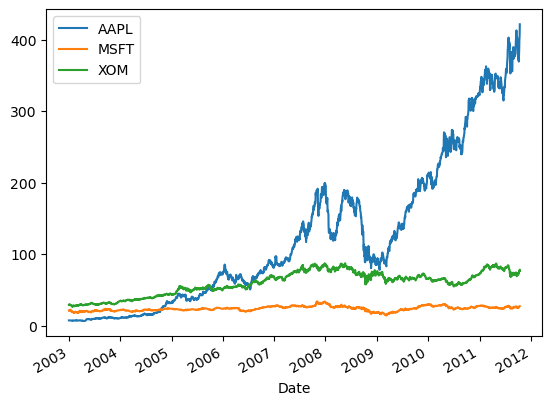

In [100]:
prices_df2[['AAPL','MSFT','XOM']].plot();

### Moving window functions

Pandas makes it easy to do all kinds of *moving window* operations like moving average, cumulative sums, and even things like exponential moving averages ("exponential smoothing").

<AxesSubplot:xlabel='Date'>

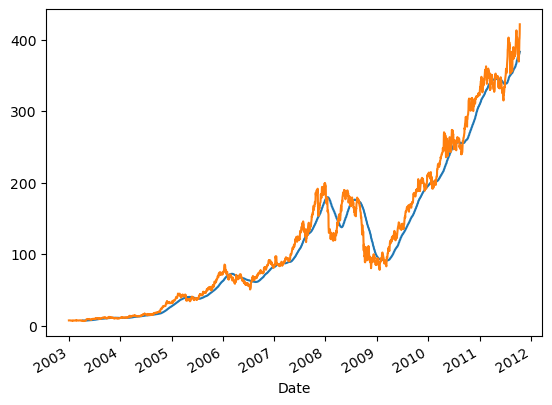

In [104]:
prices_df2['AAPL'].rolling(70).mean().plot();
prices_df2['AAPL'].plot()
